# Distance Based Statistical Method for Planar Point Patterns

**Authors: Serge Rey <sjsrey@gmail.com> and Wei Kang <wkang12@asu.edu>**

## Introduction

Distance based methods for point patterns are of three types:

* [Mean Nearest Neighbor Distance Statistics](#Mean-Nearest-Neighbor-Distance-Statistics)
* [Nearest Neighbor Distance Functions](#Nearest-Neighbor-Distance-Functions)
* [Interevent Distance Functions](#Interevent-Distance-Functions)

In addition, we are going to introduce a computational technique [Simulation Envelopes](#Simulation-Envelopes) to aid in making inferences about the data generating process. An [example](#CSR-Example) is used to demonstrate how to use and interprete simulation envelopes.

In [1]:
import scipy.spatial
import pysal as ps
import numpy as np
from pysal.contrib.points.pointpattern import PointPattern
from pysal.contrib.points.process import PoissonPointProcess 
from pysal.contrib.points.window import as_window
from pysal.contrib.points.distance_statistics import G, F, J, K, L
from pysal.contrib.points.distance_statistics import Genv, Fenv, Jenv, Kenv, Lenv
%matplotlib inline
import matplotlib.pyplot as plt

## Mean Nearest Neighbor Distance Statistics

The nearest neighbor(s) for a point $u$ is the point(s) $N(u)$ which meet the condition
$$d_{u,N(u)} \leq d_{u,j} \forall j \in S - u$$

The distance between the nearest neighbor(s) $N(u)$ and the point $u$ is nearest neighbor distance for $u$. After searching for nearest neighbor(s) for all the points and calculating the corresponding distances, we are able to calculate mean nearest neighbor distance by averaging these distances.

It was demonstrated by Clark and Evans(1954) that mean nearest neighbor distance statistics distribution is a normal distribution under null hypothesis (underlying spatial process is CSR). We can utilize the test statistics to determine whether the point pattern is the outcome of CSR. If not, is it the outcome of cluster or regular
spatial process?

Mean nearest neighbor distance statistic

$$\bar{d}_{min}=\frac{1}{n} \sum_{i=1}^n d_{min}(s_i)$$

In [2]:
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21],
          [9.47, 31.02],  [30.78, 60.10], [75.21, 58.93],
          [79.26,  7.68], [8.23, 39.93],  [98.73, 77.17],
          [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
pp = PointPattern(points)

In [3]:
pp.summary()

Point Pattern
12 points
Bounding rectangle [(8.23,7.68), (98.73,92.08)]
Area of window: 7638.2
Intensity estimate for window: 0.00157105077112
       x      y
0  66.22  32.54
1  22.52  22.39
2  31.01  81.21
3   9.47  31.02
4  30.78  60.10


We may call the method **knn** in PointPattern class to find $k$ nearest neighbors for each point in the point pattern *pp*.

In [4]:
# one nearest neighbor (default)
pp.knn()

(array([[ 9],
        [ 3],
        [ 4],
        [ 7],
        [ 2],
        [ 9],
        [11],
        [ 3],
        [ 5],
        [ 5],
        [ 5],
        [ 6]]), array([[ 25.59050019],
        [ 15.64542745],
        [ 21.11125292],
        [  8.99587128],
        [ 21.11125292],
        [ 21.93729473],
        [ 24.81289987],
        [  8.99587128],
        [ 29.76387072],
        [ 21.93729473],
        [ 34.63124168],
        [ 24.81289987]]))

The first array is the ids of the most nearest neighbor for each point, the second array is the distance between each point and its  most nearest neighbor.

In [5]:
# two nearest neighbors
pp.knn(2)

(array([[ 9, 11],
        [ 3,  7],
        [ 4, 10],
        [ 7,  1],
        [ 2,  7],
        [ 9,  0],
        [11,  0],
        [ 3,  1],
        [ 5,  9],
        [ 5,  0],
        [ 5,  2],
        [ 6,  0]]), array([[ 25.59050019,  26.78023898],
        [ 15.64542745,  22.62422816],
        [ 21.11125292,  35.86682729],
        [  8.99587128,  15.64542745],
        [ 21.11125292,  30.2544443 ],
        [ 21.93729473,  27.87924317],
        [ 24.81289987,  28.07242775],
        [  8.99587128,  22.62422816],
        [ 29.76387072,  35.77753625],
        [ 21.93729473,  25.59050019],
        [ 34.63124168,  35.86682729],
        [ 24.81289987,  26.78023898]]))

In [6]:
pp.max_nnd # Maximum nearest neighbor distance

34.63124167568931

In [7]:
pp.min_nnd # Minimum nearest neighbor distance

8.9958712752017522

In [8]:
pp.mean_nnd # mean nearest neighbor distance

21.612139802089246

In [9]:
pp.nnd # Nearest neighbor distances

array([[ 25.59050019],
       [ 15.64542745],
       [ 21.11125292],
       [  8.99587128],
       [ 21.11125292],
       [ 21.93729473],
       [ 24.81289987],
       [  8.99587128],
       [ 29.76387072],
       [ 21.93729473],
       [ 34.63124168],
       [ 24.81289987]])

In [10]:
pp.nnd.sum()/pp.n # same as pp.mean_nnd

21.612139802089246

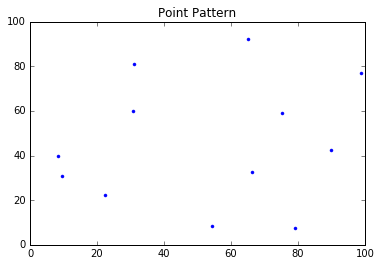

In [11]:
pp.plot()

## Nearest Neighbor Distance Functions

Nearest neighbour distance distribution functions (including the nearest “event-to-event” and “point-event” distance distribution functions) of a point process are cumulative distribution functions of several kinds -- $G, F, J$. By comparing the distance function of the observed point pattern with that of the point pattern from a CSR process, we are able to infer whether the underlying spatial process of the observed point pattern is CSR or not for a given confidence level.

#### $G$ function - event-to-event

The $G$ function is defined as follows: for a given distance $d$, $G(d)$ is the proportion of nearest neighbor distances that are less than $d$.
$$G(d) = \sum_{i=1}^n \frac{ \phi_i^d}{n}$$

$$ 
\phi_i^d =
 \begin{cases}
    1       & \quad \text{if } d_{min}(s_i)<d \\
    0       & \quad \text{otherwise } \\
  \end{cases}
$$

If the underlying point process is a CSR process, $G$ function has an expectation of:
$$
G(d) = 1-e(-\lambda \pi d^2)
$$
However, if the $G$ function plot is above the expectation this reflects clustering, while departures below expectation reflect dispersion.

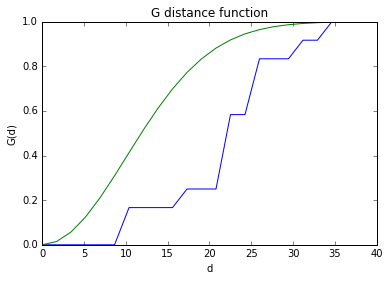

In [12]:
gp1 = G(pp, intervals=20)
gp1.plot()


A slightly different visualization of the empirical function is the quantile-quantile plot:

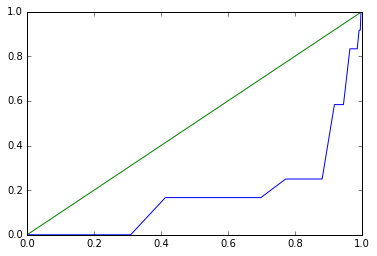

In [13]:
gp1.plot(qq=True)

in the q-q plot the csr function is now a diagonal line which serves to make accessment of departures from csr visually easier.

It is obvious that the above $G$ increases very slowly at small distances and the line is below the expected value for a CSR process (green  line). We might think that the underlying spatial process is regular point process. However, this visual inspection is not enough for a final conclusion.  In [Simulation Envelopes](#Simulation-Envelopes), we are going to demonstrate how to simulate data under CSR many times and construct the $95\%$ simulation envelope for $G$.

In [14]:
gp1.d # distance domain sequence (corresponding to the x-axis)

array([  0.        ,   1.73156208,   3.46312417,   5.19468625,
         6.92624834,   8.65781042,  10.3893725 ,  12.12093459,
        13.85249667,  15.58405875,  17.31562084,  19.04718292,
        20.77874501,  22.51030709,  24.24186917,  25.97343126,
        27.70499334,  29.43655542,  31.16811751,  32.89967959,
        34.63124168,  36.36280376])

In [15]:
gp1.G #cumulative nearest neighbor distance distribution over d (corresponding to the y-axis))

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.16666667,  0.16666667,  0.16666667,  0.16666667,
        0.25      ,  0.25      ,  0.25      ,  0.58333333,  0.58333333,
        0.83333333,  0.83333333,  0.83333333,  0.91666667,  0.91666667,
        1.        ,  1.        ])

#### $F$ function - "point-event" 

When the number of events in a point pattern is small, $G$ function is rough (see the $G$ function plot for the 12 size point pattern above). One way to get around this is to turn to $F$ funtion where a given number of randomly distributed points are generated in the domain and the nearest event neighbor distance is calculated for each point. The cumulative distribution of all nearest event neighbor distances is called $F$ function.

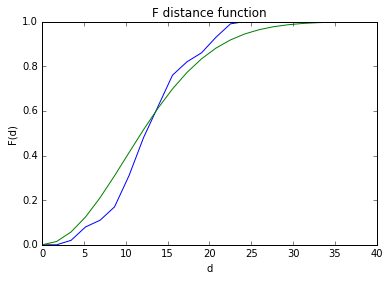

In [16]:
fp1 = F(pp, intervals=20) # The default is to randomly generate 100 points.
fp1.plot()

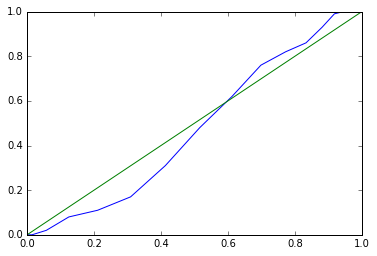

In [17]:
fp1.plot(qq=True)

We can increase the number of intervals to make $F$ more smooth.

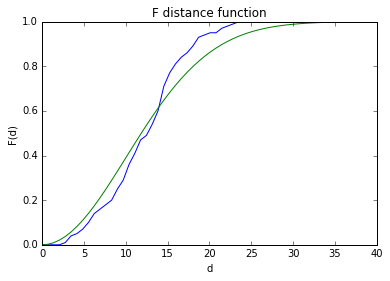

In [18]:
fp1 = F(pp, intervals=50)
fp1.plot()

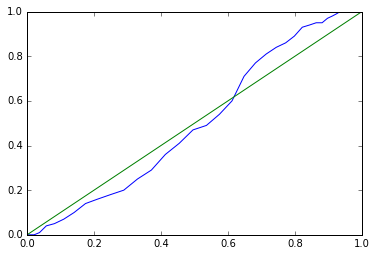

In [19]:
fp1.plot(qq=True)

$F$ function is more smooth than $G$ function. 

#### $J$ function - a combination of "event-event" and "point-event"

$J$ function is defined as follows:

$$J(d) = \frac{1-G(d)}{1-F(d)}$$

If $J(d)<1$, the underlying point process is a cluster point process; if $J(d)=1$, the underlying point process is a random point process; otherwise, it is a regular point process.

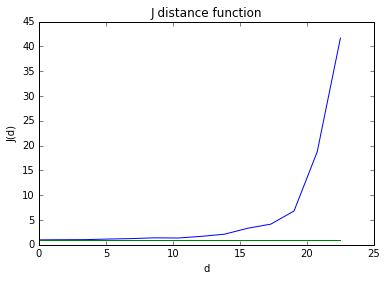

In [20]:
jp1 = J(pp, intervals=20)
jp1.plot()

From the above figure, we can observe that $J$ function is obviously above the $J(d)=1$ horizontal line. It is approaching infinity with nearest neighbor distance increasing. We might tend to conclude that the underlying point process is a regular one.

## Interevent Distance Functions

Nearest neighbor distance functions consider only the nearest neighbor distances, "event-event", "point-event" or the combination. Thus, distances to higer order neighbors are ignored, which might reveal important information regarding the point process. Interevent distance functions, including $K$ and $L$ functions, are proposed to consider distances between all pairs of event points. Similar to $G$, $F$ and $J$ functions, $K$ and $L$ functions are also cumulative distribution function.

#### $K$ function - "interevent"

Given distance $d$, $K(d)$ is defined as:
$$K(d) = \frac{\sum_{i=1}^n \sum_{j=1}^n \psi_{ij}(d)}{n \hat{\lambda}}$$

where
$$ 
\psi_{ij}(d) =
 \begin{cases}
    1       & \quad \text{if } d_{ij}<d \\
    0       & \quad \text{otherwise } \\
  \end{cases}
$$

$\sum_{j=1}^n \psi_{ij}(d)$ is the number of events within a circle of radius $d$ centered on event $s_i$ .

Still, we use CSR as the benchmark (null hypothesis) and see how the $K$ funtion estimated from the observed point pattern deviate from that under CSR, which is $K(d)=\pi d^2$. $K(d)<\pi d^2$ indicates that the underlying point process is a regular point process. $K(d)>\pi d^2$ indicates that the underlying point process is a cluster point process. 

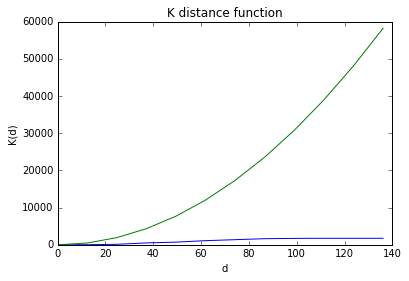

In [21]:
kp1 = K(pp)
kp1.plot()

#### $L$ function - "interevent"

$L$ function is a scaled version of $K$ function, defined as:
$$L(d) = \sqrt{\frac{K(d)}{\pi}}-d$$

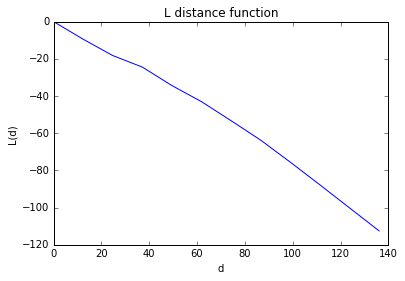

In [22]:
lp1 = L(pp)
lp1.plot()

## Simulation Envelopes

A [Simulation envelope](http://www.esajournals.org/doi/pdf/10.1890/13-2042.1) is a computer intensive technique for inferring whether an observed pattern significantly deviates from what would be expected under a specific process. Here, we always use CSR as the benchmark. In order to construct a simulation envelope for a given function, we need to simulate CSR a lot of times, say $1000$ times. Then, we can calculate the function for each simulated point pattern. For every distance $d$, we sort the function values of the $1000$ simulated point patterns. Given a confidence level, say $95\%$, we can acquire the $25$th and $975$th value for every distance $d$. Thus, a simulation envelope is constructed. 

#### Simulation Envelope for G function

**Genv** class in pysal.

In [23]:
realizations = PoissonPointProcess(pp.window, pp.n, 100, asPP=True) # simulate CSR 100 times
genv = Genv(pp, intervals=20, realizations=realizations) # call Genv to generate simulation envelope
genv

In [24]:
genv.observed 

array([[  0.        ,   0.        ],
       [  1.73156208,   0.        ],
       [  3.46312417,   0.        ],
       [  5.19468625,   0.        ],
       [  6.92624834,   0.        ],
       [  8.65781042,   0.        ],
       [ 10.3893725 ,   0.16666667],
       [ 12.12093459,   0.16666667],
       [ 13.85249667,   0.16666667],
       [ 15.58405875,   0.16666667],
       [ 17.31562084,   0.25      ],
       [ 19.04718292,   0.25      ],
       [ 20.77874501,   0.25      ],
       [ 22.51030709,   0.58333333],
       [ 24.24186917,   0.58333333],
       [ 25.97343126,   0.83333333],
       [ 27.70499334,   0.83333333],
       [ 29.43655542,   0.83333333],
       [ 31.16811751,   0.91666667],
       [ 32.89967959,   0.91666667],
       [ 34.63124168,   1.        ],
       [ 36.36280376,   1.        ]])

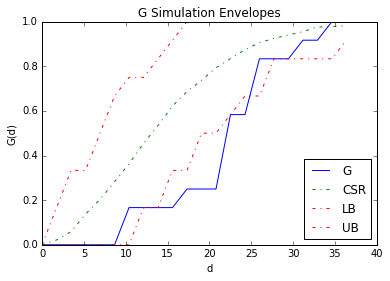

In [25]:
genv.plot()

In the above figure, **LB** and **UB** comprise the simulation envelope. **CSR** is the mean function calculated from the simulated data. **G** is the function estimated from the observed point pattern. It is well below the simulation envelope. We can infer that the underlying point process is a regular one.

#### Simulation Envelope for F function

**Fenv** class in pysal.

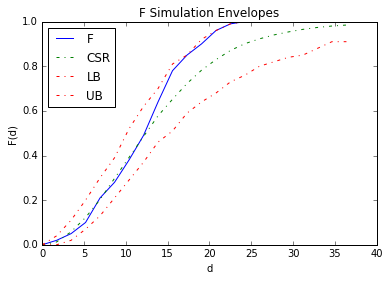

In [26]:
fenv = Fenv(pp, intervals=20, realizations=realizations)
fenv.plot()

#### Simulation Envelope for J function

**Jenv** class in pysal.

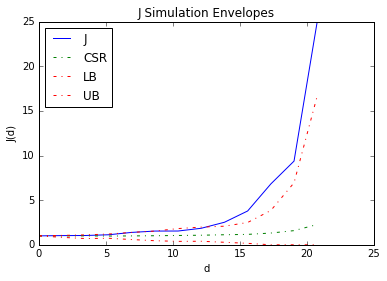

In [27]:
jenv = Jenv(pp, intervals=20, realizations=realizations)
jenv.plot()

#### Simulation Envelope for K function

**Kenv** class in pysal.

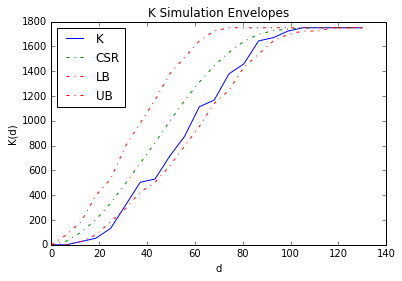

In [28]:
kenv = Kenv(pp, intervals=20, realizations=realizations)
kenv.plot()

#### Simulation Envelope for L function

**Lenv** class in pysal.

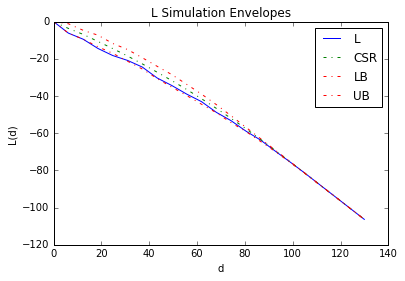

In [29]:
lenv = Lenv(pp, intervals=20, realizations=realizations)
lenv.plot()

## CSR Example
In this example, we are going to generate a point pattern as the "observed" point pattern. The data generating process is CSR. Then, we will simulate CSR in the same domain for 100 times and construct a simulation envelope for each function.

In [30]:
from pysal.contrib import shapely_ext
from pysal.contrib.points.window import Window
va = ps.open(ps.examples.get_path("vautm17n.shp"))
polys = [shp for shp in va]
state = shapely_ext.cascaded_union(polys)

Generate the point pattern **pp** (size 100) from CSR as the "observed" point pattern.

In [31]:
a = [[1],[1,2]]
np.asarray(a)

array([[1], [1, 2]], dtype=object)

In [32]:
n = 100
samples = 1
pp = PoissonPointProcess(Window(state.parts), n, samples, asPP=True)
pp.realizations[0]

In [33]:
pp.n

100

Simulate CSR in the same domian for 100 times which would be used for constructing simulation envelope under the null hypothesis of CSR.

In [34]:
csrs = PoissonPointProcess(pp.window, 100, 100, asPP=True)
csrs

Construct the simulation envelope for $G$ function.

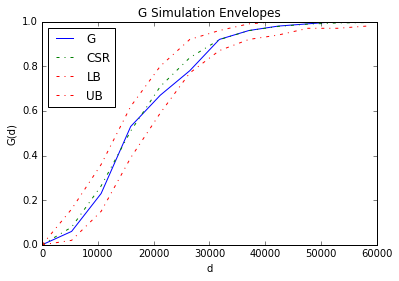

In [35]:
genv = Genv(pp.realizations[0], realizations=csrs)
genv.plot()

Since the "observed" $G$ is well contained by the simulation envelope, we infer that the underlying point process is a random process.

In [36]:
genv.low # lower bound of the simulation envelope for G

array([ 0.  ,  0.02,  0.15,  0.39,  0.59,  0.77,  0.87,  0.92,  0.94,
        0.97,  0.97,  0.98])

In [37]:
genv.high # higher bound of the simulation envelope for G

array([ 0.  ,  0.16,  0.36,  0.62,  0.8 ,  0.92,  0.96,  0.99,  1.  ,
        1.  ,  1.  ,  1.  ])

Construct the simulation envelope for $F$ function.

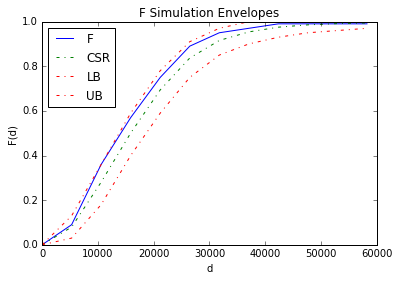

In [38]:
fenv = Fenv(pp.realizations[0], realizations=csrs)
fenv.plot()

Construct the simulation envelope for $J$ function.

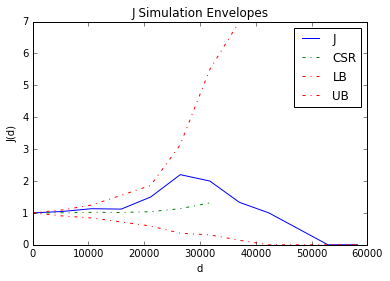

In [39]:
jenv = Jenv(pp.realizations[0], realizations=csrs)
jenv.plot()

Construct the simulation envelope for $K$ function.

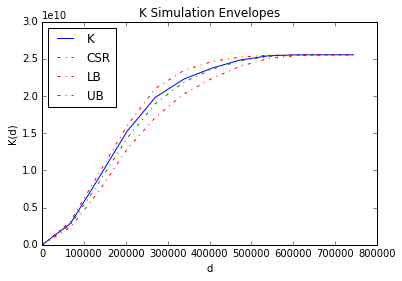

In [40]:
kenv = Kenv(pp.realizations[0], realizations=csrs)
kenv.plot()

Construct the simulation envelope for $L$ function.

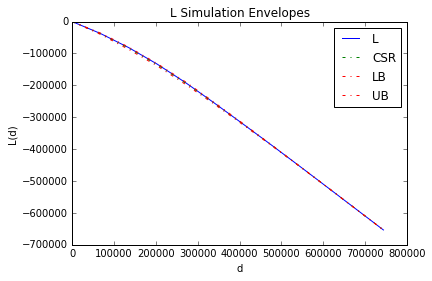

In [41]:
lenv = Lenv(pp.realizations[0], realizations=csrs)
lenv.plot()